In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [3]:
train_data=pd.read_excel("Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
train_data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data['journey_day']=pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [13]:
train_data['journey_month']=pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
train_data.drop(['Date_of_Journey'], axis= 1, inplace=True)

In [17]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [18]:
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

In [20]:
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [21]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [25]:
train_data.drop(['Dep_Time'], axis= 1, inplace=True)

In [26]:
train_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [27]:
train_data['arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [28]:
train_data['arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [29]:
train_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [30]:
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [31]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [34]:
train_data['duration_hour']=train_data['Duration'].apply(lambda x : x.split(' ') [0])

In [37]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2h
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7h
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19h
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5h
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2h
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2h
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3h
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2h


In [38]:
train_data.drop(['Duration'], axis=1, inplace=True)

In [40]:
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2h
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7h
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19h
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5h
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2h
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2h
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3h
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2h


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
labelencoder=LabelEncoder()

In [43]:
train_data['Airline']=labelencoder.fit_transform(train_data['Airline'])
train_data['Source']=labelencoder.fit_transform(train_data['Source'])
train_data['Destination']=labelencoder.fit_transform(train_data['Destination'])
train_data['Total_Stops']=labelencoder.fit_transform(train_data['Total_Stops'])


In [44]:
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour
0,3,0,5,BLR → DEL,4,No info,3897,24,3,22,20,1,10,2h
1,1,3,0,CCU → IXR → BBI → BLR,1,No info,7662,1,5,5,50,13,15,7h
2,4,2,1,DEL → LKO → BOM → COK,1,No info,13882,9,6,9,25,4,25,19h
3,3,3,0,CCU → NAG → BLR,0,No info,6218,12,5,18,5,23,30,5h
4,3,0,5,BLR → NAG → DEL,0,No info,13302,1,3,16,50,21,35,4h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,4,No info,4107,9,4,19,55,22,25,2h
10679,1,3,0,CCU → BLR,4,No info,4145,27,4,20,45,23,20,2h
10680,4,0,2,BLR → DEL,4,No info,7229,27,4,8,20,11,20,3h
10681,10,0,5,BLR → DEL,4,No info,12648,1,3,11,30,14,10,2h


In [45]:
train_data['Total_Stops'].unique()

array([4, 1, 0, 2, 3])

In [48]:
train_data['Total_Stops'].head(20)

0     4
1     1
2     1
3     0
4     0
5     4
6     0
7     0
8     0
9     0
10    0
11    4
12    4
13    0
14    4
15    1
16    0
17    0
18    1
19    0
Name: Total_Stops, dtype: int32

In [47]:
train_data['Total_Stops'].value_counts()

0    5625
4    3491
1    1520
2      45
3       1
Name: Total_Stops, dtype: int64

In [49]:
train_data.drop(['Route'], axis=1, inplace=True)

In [50]:
train_data.nunique()

Airline              12
Source                5
Destination           6
Total_Stops           5
Additional_Info      10
Price              1870
journey_day          10
journey_month         4
Dep_hour             24
Dep_min              12
arrival_hour         24
arrival_min          12
duration_hour        44
dtype: int64

In [54]:
train_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour
0,3,0,5,4,No info,3897,24,3,22,20,1,10,2h
1,1,3,0,1,No info,7662,1,5,5,50,13,15,7h
2,4,2,1,1,No info,13882,9,6,9,25,4,25,19h
3,3,3,0,0,No info,6218,12,5,18,5,23,30,5h
4,3,0,5,0,No info,13302,1,3,16,50,21,35,4h
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,No info,4107,9,4,19,55,22,25,2h
10679,1,3,0,4,No info,4145,27,4,20,45,23,20,2h
10680,4,0,2,4,No info,7229,27,4,8,20,11,20,3h
10681,10,0,5,4,No info,12648,1,3,11,30,14,10,2h


In [55]:
train_data.drop(['Additional_Info'], axis=1, inplace=True)

In [56]:
train_data

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour
0,3,0,5,4,3897,24,3,22,20,1,10,2h
1,1,3,0,1,7662,1,5,5,50,13,15,7h
2,4,2,1,1,13882,9,6,9,25,4,25,19h
3,3,3,0,0,6218,12,5,18,5,23,30,5h
4,3,0,5,0,13302,1,3,16,50,21,35,4h
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,9,4,19,55,22,25,2h
10679,1,3,0,4,4145,27,4,20,45,23,20,2h
10680,4,0,2,4,7229,27,4,8,20,11,20,3h
10681,10,0,5,4,12648,1,3,11,30,14,10,2h


In [78]:
train_data.drop(['duration_hour'], axis=1, inplace=True)

In [79]:
train_data

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min
0,3,0,5,4,3897,24,3,22,20,1,10
1,1,3,0,1,7662,1,5,5,50,13,15
2,4,2,1,1,13882,9,6,9,25,4,25
3,3,3,0,0,6218,12,5,18,5,23,30
4,3,0,5,0,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,9,4,19,55,22,25
10679,1,3,0,4,4145,27,4,20,45,23,20
10680,4,0,2,4,7229,27,4,8,20,11,20
10681,10,0,5,4,12648,1,3,11,30,14,10


In [52]:
test_data=pd.read_excel('Test_set.xlsx')

In [53]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [57]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [59]:
test_data.dropna(inplace=True)

In [60]:
test_data['journey_day']=pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [61]:
test_data['journey_month']=pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [62]:
test_data.drop(['Date_of_Journey'], axis= 1, inplace=True)

In [63]:
test_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3


In [64]:
test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [65]:
test_data.drop(['Dep_Time'], axis= 1, inplace=True)

In [66]:
test_data['arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [67]:
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [68]:
test_data['duration_hour']=test_data['Duration'].apply(lambda x : x.split(' ') [0])

In [69]:
test_data.drop(['Duration'], axis=1, inplace=True)

In [70]:
test_data['Airline']=labelencoder.fit_transform(test_data['Airline'])
test_data['Source']=labelencoder.fit_transform(test_data['Source'])
test_data['Destination']=labelencoder.fit_transform(test_data['Destination'])
test_data['Total_Stops']=labelencoder.fit_transform(test_data['Total_Stops'])


In [71]:
test_data.drop(['Additional_Info'], axis=1, inplace=True)

In [72]:
test_data

,Airline,Source,Destination,Route,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour
0,4,2,1,DEL → BOM → COK,0,6,6,17,30,4,25,10h
1,3,3,0,CCU → MAA → BLR,0,12,5,6,20,10,20,4h
2,4,2,1,DEL → BOM → COK,0,21,5,19,15,19,0,23h
3,6,2,1,DEL → BOM → COK,0,21,5,8,0,21,0,13h
4,0,0,2,BLR → DEL,4,24,6,23,55,2,45,2h
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,CCU → DEL → BLR,0,6,6,20,30,20,25,23h
2667,3,3,0,CCU → BLR,4,27,3,14,20,16,55,2h
2668,4,2,1,DEL → BOM → COK,0,6,3,21,50,4,25,6h
2669,1,2,1,DEL → BOM → COK,0,6,3,4,0,19,15,15h


In [73]:
test_data.drop(['Route'], axis=1, inplace=True)

In [74]:
test_data

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour
0,4,2,1,0,6,6,17,30,4,25,10h
1,3,3,0,0,12,5,6,20,10,20,4h
2,4,2,1,0,21,5,19,15,19,0,23h
3,6,2,1,0,21,5,8,0,21,0,13h
4,0,0,2,4,24,6,23,55,2,45,2h
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,6,6,20,30,20,25,23h
2667,3,3,0,4,27,3,14,20,16,55,2h
2668,4,2,1,0,6,3,21,50,4,25,6h
2669,1,2,1,0,6,3,4,0,19,15,15h


In [77]:
test_data.drop(['duration_hour'], axis=1, inplace=True)

In [80]:
test_data

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min
0,4,2,1,0,6,6,17,30,4,25
1,3,3,0,0,12,5,6,20,10,20
2,4,2,1,0,21,5,19,15,19,0
3,6,2,1,0,21,5,8,0,21,0
4,0,0,2,4,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,6,6,20,30,20,25
2667,3,3,0,4,27,3,14,20,16,55
2668,4,2,1,0,6,3,21,50,4,25
2669,1,2,1,0,6,3,4,0,19,15


Feature selectioin

In [82]:
x=train_data.drop('Price',axis=1)
x

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,arrival_hour,arrival_min
0,3,0,5,4,24,3,22,20,1,10
1,1,3,0,1,1,5,5,50,13,15
2,4,2,1,1,9,6,9,25,4,25
3,3,3,0,0,12,5,18,5,23,30
4,3,0,5,0,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,9,4,19,55,22,25
10679,1,3,0,4,27,4,20,45,23,20
10680,4,0,2,4,27,4,8,20,11,20
10681,10,0,5,4,1,3,11,30,14,10


In [83]:
y=train_data['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

<AxesSubplot:>

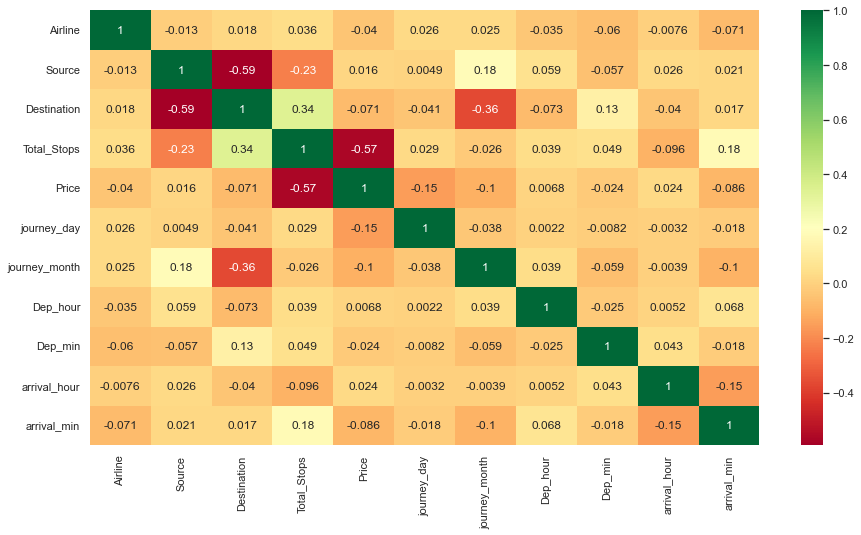

In [85]:
correlation=train_data.corr()
correlation_features=correlation.index
plt.figure(figsize=(15,8))
sns.heatmap(train_data[correlation_features].corr(), annot=True, cmap='RdYlGn')

In [86]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
model.feature_importances_

array([0.15806519, 0.01907915, 0.03520184, 0.42516019, 0.15491926,
       0.05317535, 0.04319453, 0.0361356 , 0.04469945, 0.03036945])

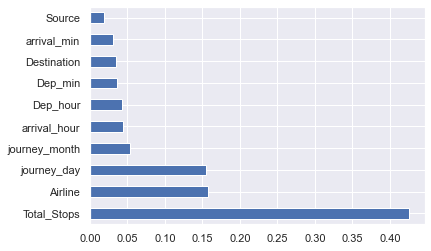

In [88]:
feat_importance=pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(11).plot(kind='barh')
plt.show()

In [96]:
from sklearn.model_selection import train_test_split

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [99]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1.2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        },
        'random_forest' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators' : [100],
                'criterion' : ['squared_error','absolute_error','poisson'],
                'max_features' : ['sqrt', 'log2']
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x_train,y_train)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(x,y)

C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, 

C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, 

C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, 

C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, 

C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Macbook\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, 

,model,best_score,best_params
0,linear_regression,0.381833,{'normalize': True}
1,lasso,0.381840,"{'alpha': 1.2, 'selection': 'random'}"
2,decision_tree,0.725395,"{'criterion': 'mse', 'splitter': 'best'}"
3,random_forest,0.750862,"{'criterion': 'poisson', 'max_features': 'sqrt..."


In [100]:
model=RandomForestRegressor(criterion='poisson',max_features='sqrt')

In [134]:
model.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', max_features='sqrt')

In [135]:
y_pred=model.predict(x_test)

In [136]:
print(y_pred)

[13328.48216667  6387.14        3930.17916667 ... 11351.938
 12898.45        3927.53      ]


Text(0.5, 1.0, 'Price Prediction')

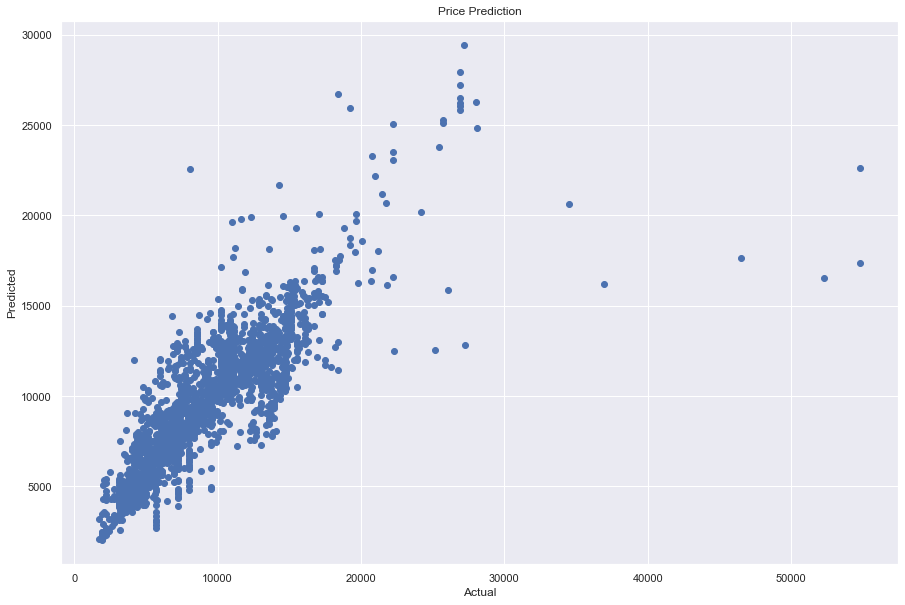

In [137]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Price Prediction')

<AxesSubplot:xlabel='Price'>

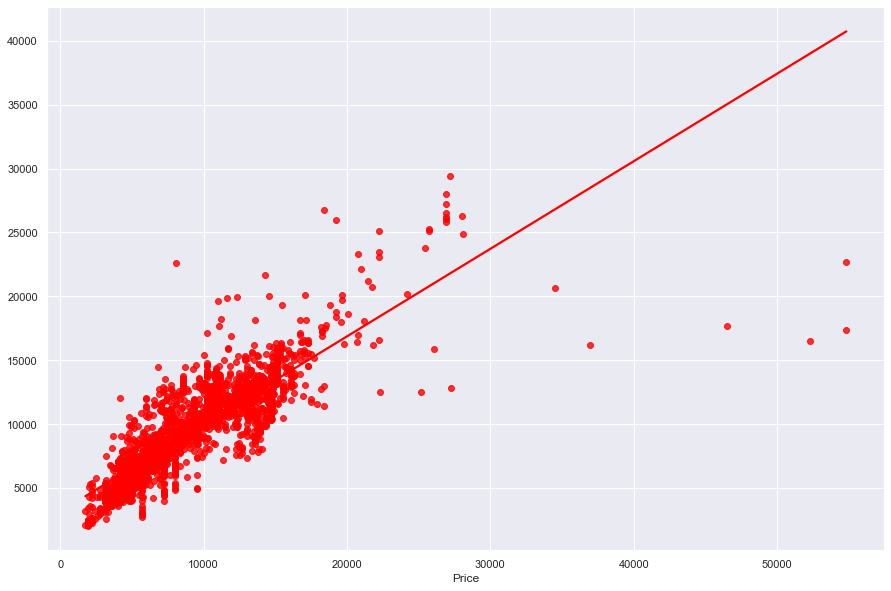

In [138]:
plt.figure(figsize=(15,10))
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [139]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7015244922815691